# RNN

### Date 26.06.24

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense


text='AIUItimators is providing AI service and development company'
chars=sorted(list(set(text)))
# print(list(enumerate(chars)))
char_to_index={char:i for i,char in enumerate(chars)}
index_to_char={i:i for i,char in enumerate(chars)}

seq_length=3
sequences=[];labels=[]
for i in range(len(text)-seq_length):
    seq=text[i:i+seq_length]
    label=text[i+seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])


x=np.array(sequences)
y=np.array(labels)
x_one_hot=tf.one_hot(x,len(chars))
y_one_hot=tf.one_hot(y,len(chars))

model=Sequential()
model.add(SimpleRNN(units=50,input_shape=(seq_length,len(chars)),activation='relu'))
model.add(Dense(len(chars),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_one_hot,y_one_hot,epochs=100)

Epoch 1/100


c:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1118 - loss: 2.9656
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1118 - loss: 2.9445
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1352 - loss: 2.9264 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1573 - loss: 2.9090 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1573 - loss: 2.8918 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1795 - loss: 2.8745
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2250 - loss: 2.8572
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2588 - loss: 2.8396
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2588 - loss: 2.8217
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2705 - loss: 2.8032
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2822 - loss: 2.7842 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2822 - loss: 2.7645
Ep

### RNN Using Dataset

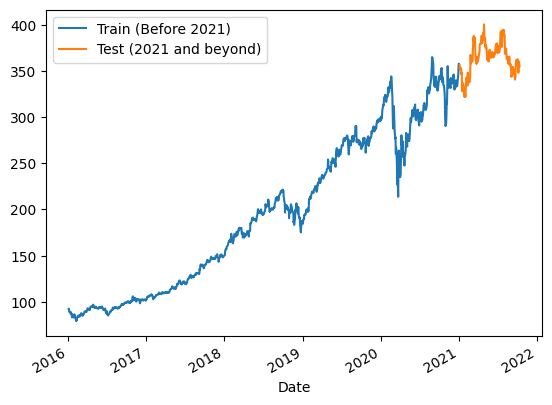

In [19]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
import pandas as pd
import matplotlib.pyplot as plt
set_seed(455)
np.random.seed(455)

data=pd.read_csv('Mastercard_stock_history.csv',index_col="Date",
                 parse_dates=['Date'])
datas=data.drop(['Dividends','Stock Splits'],axis=1)

tstart,tend=2016,2020
def train_test_plot(datas,tstart,tend):
    datas.loc[f'{tstart}':f'{tend}',"High"].plot(legend=True)
    datas.loc[f'{tend+1}':,"High"].plot(legend=True)
    plt.legend([f"Train (Before {tend+1})",f"Test ({tend+1} and beyond)"])

train_test_plot(datas,tstart,tend)

#Data Preprocessing
def train_test_split(datas,tstart,tend):
    train=datas.loc[f'{tstart}':f'{tend}',"High"].values
    test=datas.loc[f'{tend+1}':,"High"]
    # print(type(train))
    return train,test 

train,test=train_test_split(datas,tstart,tend)


